**The Sparks Foundation #GRIPMARCH21
Prediction using unsupervised Machine Learning
Task 1 : Predict the percentage of an student based on the no. of study hours.
Name: DRASHTI BHINGRADIYA**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#importing dataset
data = pd.read_csv('dataset.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [34]:
data.shape  #matrix dimension

(25, 2)

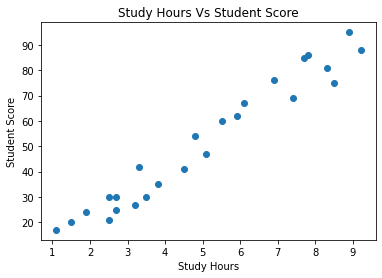

In [10]:
# Plotting the distribution of scores
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Student Score")
plt.title("Study Hours Vs Student Score")
plt.show()

In [11]:
#Cleaning of data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [13]:
# split dataset for training
x=data.drop("Scores", axis="columns")
y=data.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=51) 
# tes_size is defining how much data we want for testing so 0.2 means i am using 20 percent data for testing

In [15]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (20, 1)
shape of Y Train (20, 1)
shape of X Test (5, 1)
shape of Y Test (5, 1)


In [16]:
# So in above scatter plot as we saw that when the value of x is increasing the value of y is also increasing in a linear format so we can use linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [17]:
lr.coef_

array([[9.56433743]])

In [18]:
lr.intercept_

array([2.70197068])

In [19]:
m= 3.93
c= 50.44
y= m*12+c
y

97.6

In [20]:
lr.predict([[4]])[0][0].round(2)

40.96

In [21]:
y_pred=lr.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [22]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["study_hours","student_scores_original","student_marks_predicted"])

,study_hours,student_scores_original,student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [23]:
lr.score(X_test,Y_test) # so our model is giving the accuracy of 92.38%

0.9238518102278777

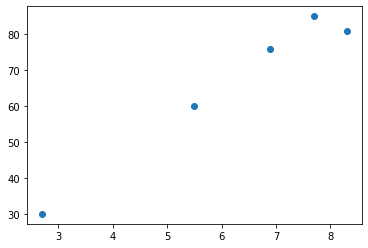

In [24]:
plt.scatter(X_test,Y_test)

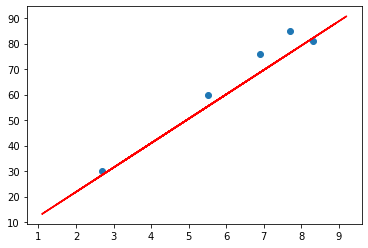

In [25]:
# Plotting for the test data
plt.scatter(X_test,Y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

In [36]:
#savind data in compressed file
import joblib
joblib.dump(lr,"Student_Marks_Predictor.pkl")

['Student_Marks_Predictor.pkl']

In [27]:
model=joblib.load("Student_Marks_Predictor.pkl")

In [39]:
#predicting for 5 hours
model.predict([[5]])

array([[50.52365786]])

In [42]:
#predicting for 9.25 hours
hours=9.25
own_pred = model.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [91.17209195]
